# Import thư viện

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
train_path = "/content/sample_data/adult.data"
test_path = "/content/sample_data/adult.test"

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df_train = pd.read_csv(train_path, names=columns, na_values="?", skipinitialspace=True)
df_test = pd.read_csv(test_path, names=columns, na_values="?", skipinitialspace=True, skiprows=1)

# Fix income trong file test (bỏ dấu ".")
df_test["income"] = df_test["income"].str.replace(".", "", regex=False)

df = pd.concat([df_train, df_test], ignore_index=True)

df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# PHẦN 1 — MÔ HÌNH KHÔNG TIỀN XỬ LÝ

In [6]:
df_raw = df.dropna().copy()

df_raw_encoded = df_raw.copy()
le_dict = {}

for col in df_raw.columns:
    if df_raw[col].dtype == "object":
        le = LabelEncoder()
        df_raw_encoded[col] = le.fit_transform(df_raw[col])
        le_dict[col] = le

X_raw = df_raw_encoded.drop("income", axis=1)
y_raw = df_raw_encoded["income"]

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)


**Train 3 mô hình**

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

print("========== KẾT QUẢ: CHƯA TIỀN XỬ LÝ ==========")

for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train_raw, y_train_raw)
    preds = model.predict(X_test_raw)

    print("Accuracy:", accuracy_score(y_test_raw, preds))
    print(classification_report(y_test_raw, preds))


========== KẾT QUẢ: CHƯA TIỀN XỬ LÝ ==========

----- Logistic Regression -----


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8034273079049199
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6745
           1       0.68      0.42      0.52      2300

    accuracy                           0.80      9045
   macro avg       0.76      0.68      0.70      9045
weighted avg       0.79      0.80      0.79      9045


----- Random Forest -----
Accuracy: 0.85616362631288
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6745
           1       0.76      0.64      0.69      2300

    accuracy                           0.86      9045
   macro avg       0.82      0.78      0.80      9045
weighted avg       0.85      0.86      0.85      9045


----- SVM -----
Accuracy: 0.7887230514096186
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6745
           1       0.96      0.18      0.30      2300

    accuracy                           0.79      9045

# PHẦN 2 — MÔ HÌNH SAU KHI TIỀN XỬ LÝ FULL

**Làm sạch dữ liệu**

In [8]:
df_clean = df.dropna().copy()


**One-Hot Encoding biến phân loại**

In [9]:
df_clean_ohe = pd.get_dummies(df_clean, drop_first=True)
df_clean_ohe.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


**Chuẩn hóa biến số**

In [10]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain',
            'capital_loss', 'hours_per_week']

scaler = StandardScaler()
df_clean_ohe[num_cols] = scaler.fit_transform(df_clean_ohe[num_cols])


**Tách train/test**

In [11]:
X = df_clean_ohe.drop("income_>50K", axis=1)
y = df_clean_ohe["income_>50K"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Train 3 mô hình**

In [12]:
print("\n========== KẾT QUẢ: SAU TIỀN XỬ LÝ ==========")

for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))



========== KẾT QUẢ: SAU TIỀN XỬ LÝ ==========

----- Logistic Regression -----
Accuracy: 0.8530679933665009
              precision    recall  f1-score   support

       False       0.87      0.94      0.90      6745
        True       0.77      0.61      0.68      2300

    accuracy                           0.85      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045


----- Random Forest -----
Accuracy: 0.8541735765616363
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      6745
        True       0.75      0.64      0.69      2300

    accuracy                           0.85      9045
   macro avg       0.82      0.78      0.80      9045
weighted avg       0.85      0.85      0.85      9045


----- SVM -----
Accuracy: 0.8556108347153123
              precision    recall  f1-score   support

       False       0.87      0.94      0.91      6745
        True       0.78   

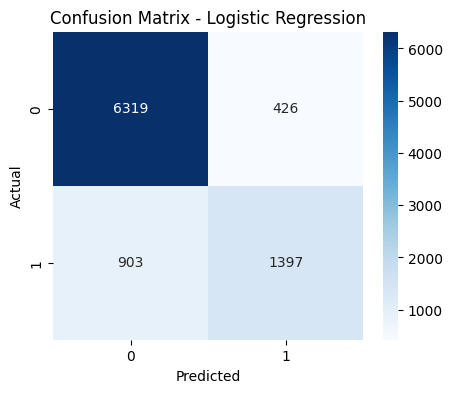

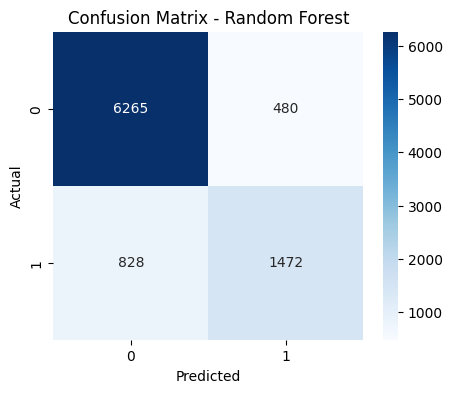

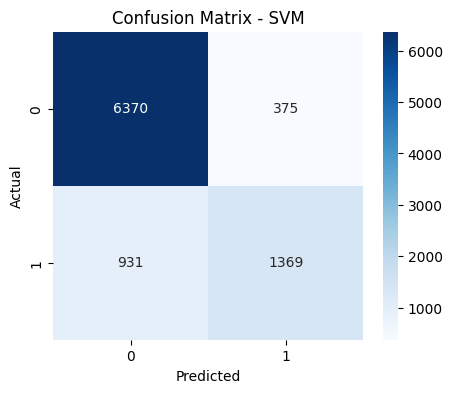

In [13]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    cm = confusion_matrix(y_test, preds)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
